In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
import seaborn as sns

In [2]:
hd = pd.read_csv(r"C:\Users\rpaul\Downloads\archive\heart.csv")

In [5]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
hd.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
hd['target'].nunique()

2

In [10]:
x=hd.drop('target',axis=1)
y=hd['target']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [12]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

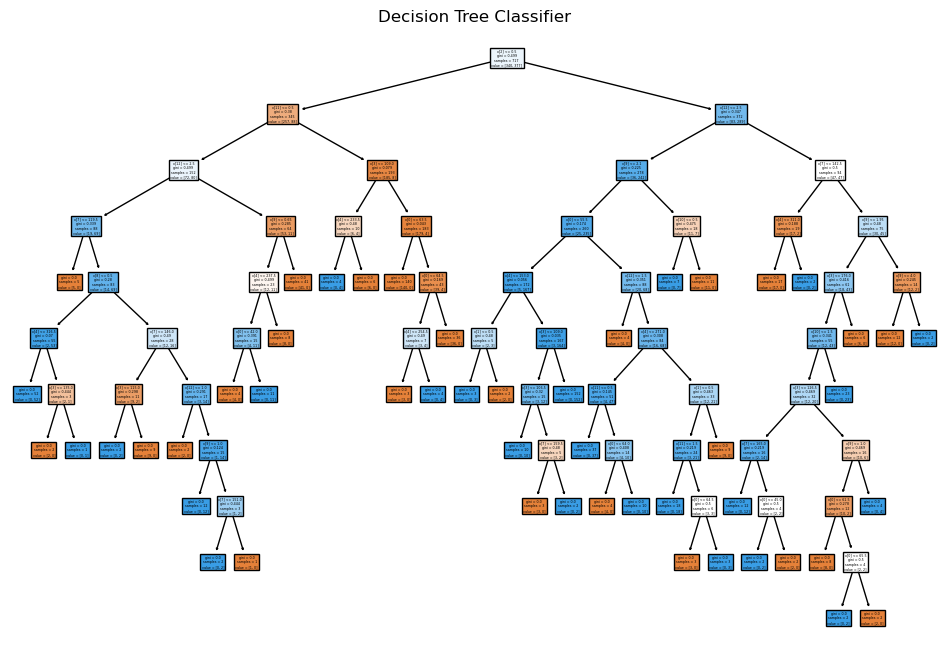

In [14]:
plt.figure(figsize=(12, 8))
plot_tree(dtree, filled=True)
plt.title("Decision Tree Classifier")
plt.show()

In [15]:
train_accuracies = []
test_accuracies = []
depth_range = range(1, 11)

for depth in depth_range:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(x_train, y_train)
    train_accuracies.append(dt.score(x_train, y_train))
    test_accuracies.append(dt.score(x_test, y_test))

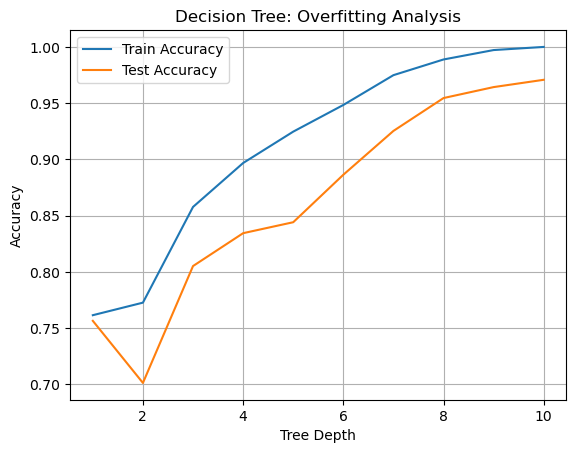

In [16]:
plt.plot(depth_range, train_accuracies, label='Train Accuracy')
plt.plot(depth_range, test_accuracies, label='Test Accuracy')
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree: Overfitting Analysis")
plt.legend()
plt.grid(True)
plt.show()

In [17]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
y_pred_dt = dtree.predict(x_test)
y_pred_rf = rf.predict(x_test)

In [21]:
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_rf = accuracy_score(y_test, y_pred_rf)

In [22]:
print(f"Decision Tree Accuracy: {acc_dt:.2f}")
print(f"Random Forest Accuracy: {acc_rf:.2f}")

Decision Tree Accuracy: 0.97
Random Forest Accuracy: 0.98


In [25]:
feature_names= ['age','sex','p','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']

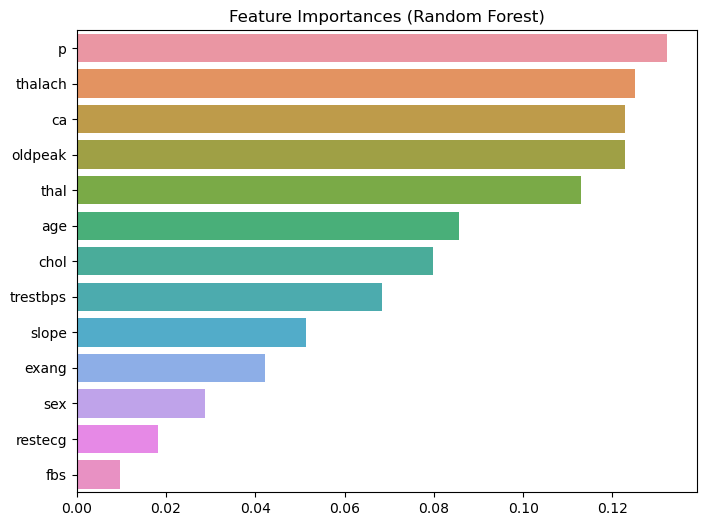

In [26]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 6))
sns.barplot(x=importances[indices], y=np.array(feature_names)[indices])
plt.title("Feature Importances (Random Forest)")
plt.show()